In [1]:
import http.client
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
today_date = datetime.date.today().strftime("%Y-%m-%d")

In [2]:
def get_stocks():
#     conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")

#     headers = {
#         'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
#         'x-rapidapi-key': "5d79aadd91msh6e2014127ab2d99p15695djsn9d67a28ba3ed"
#     }
#     conn.request("GET", "/stock/v3/get-historical-data?region=US&symbol=TSLA", headers=headers)

#     res = conn.getresponse()
#     data = res.read()

#     with open(f'data/tesla_stock_historical_{today_date}.json', 'w') as out:
#         out.write(data.decode("utf-8")+'\n')

#     print("\nStreaming completed\n")


    conn = http.client.HTTPSConnection("yahoo-finance15.p.rapidapi.com")

    headers = {
        'x-rapidapi-key': "5d79aadd91msh6e2014127ab2d99p15695djsn9d67a28ba3ed",
        'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
        }

    conn.request("GET", "/api/yahoo/hi/history/TSLA/1d", headers=headers)

    res = conn.getresponse()
    data = res.read()

    with open(f'data/tesla_stock_historical_{today_date}_all.json', 'w') as out:
        out.write(data.decode("utf-8")+'\n')

    print("\nStreaming completed\n")

In [3]:
get_stocks()


Streaming completed



In [5]:
json_file_path = f'./data/tesla_stock_historical_{today_date}_all.json'

with open(json_file_path, 'r') as j:
     stock_dict = json.loads(j.read())

In [6]:
stock_dict.keys()

dict_keys(['meta', 'items', 'error'])

In [7]:
def unix2date(unixdate):
    date = datetime.datetime.fromtimestamp(int(unixdate)).strftime('%Y-%m-%d')
    return date

In [107]:
def change_date_format(date):
    date = datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%Y-%m-%d')
    return date

In [124]:
# stocks_df = pd.DataFrame.from_dict(stock_dict['prices'])

stocks_df = pd.DataFrame.from_dict(stock_dict['items'].values())
stocks_df['date'] = stocks_df.apply(lambda row : change_date_format(row.date), axis=1)
stocks_df.set_index('date', inplace=True)
# stocks_df['time_stamp'] = stocks_df.apply(lambda row : unix2date(row.date), axis=1)
# stocks_df.drop(['numerator','denominator','splitRatio','type','data'], axis=1,inplace=True)

In [125]:
stocks_df.shape

(2518, 5)

In [126]:
stocks_df.head()

,open,high,low,close,adjclose
date,,,,,
2010-11-16,6.20,6.28,5.68,5.93,5.93
2010-11-17,6.04,6.15,5.72,5.90,5.90
2010-11-18,6.13,6.15,5.78,5.98,5.98
2010-11-19,6.03,6.27,5.94,6.20,6.20
2010-11-22,6.31,6.69,6.30,6.68,6.68


In [128]:
stocks_df.tail()

,open,high,low,close,adjclose
date,,,,,
2020-11-10,420.09,420.09,396.03,410.36,410.36
2020-11-11,416.45,418.70,410.58,417.13,417.13
2020-11-12,415.05,423.00,409.52,411.76,411.76
2020-11-13,410.85,412.53,401.66,408.50,408.50
2020-11-16,408.93,412.44,404.09,410.39,410.39


In [14]:
# stocks_df = stocks_df.set_index('time_stamp')

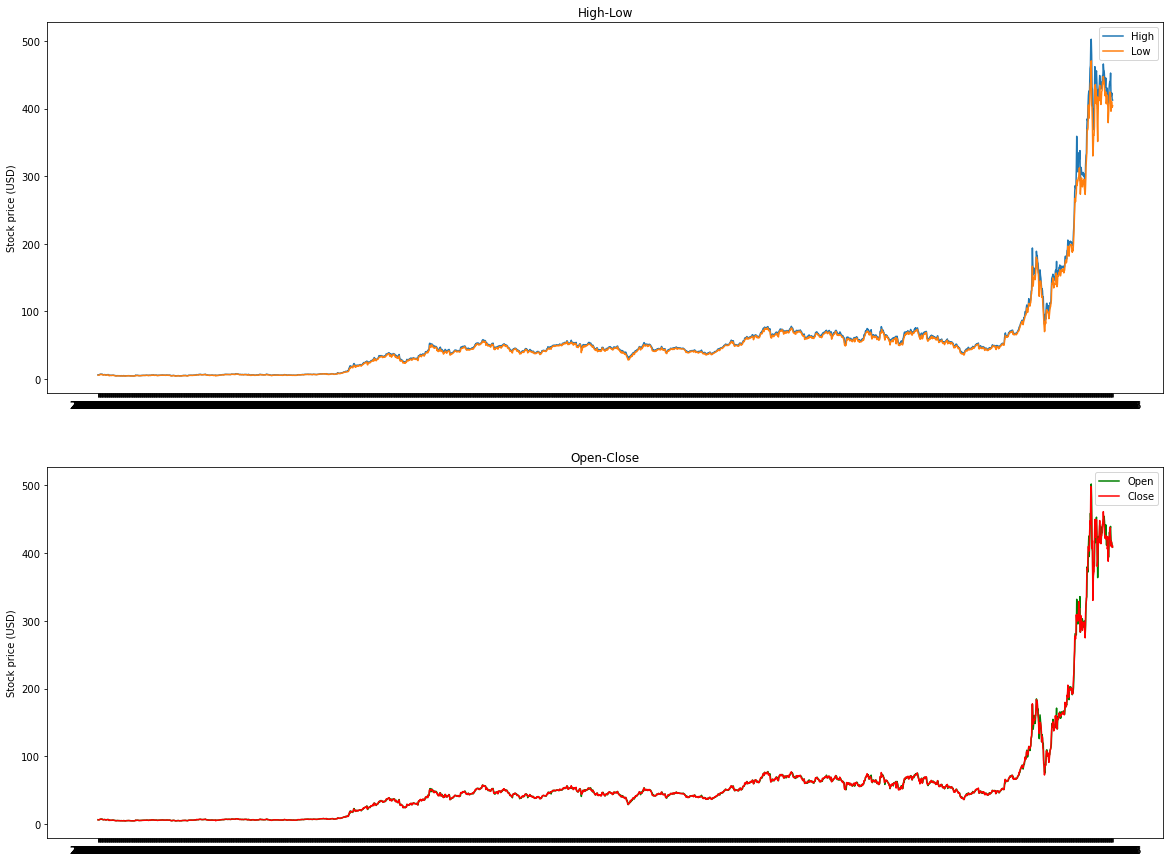

In [129]:
fig, axs = plt.subplots(2,1, figsize=(20,15))
# fig, axs = plt.subplots(3,1, figsize=(20,15))
axs[0].plot(stocks_df.index,stocks_df['high'], label="High")
axs[0].plot(stocks_df.index,stocks_df['low'], label="Low")
axs[1].plot(stocks_df.index,stocks_df['open'], label="Open", c="green")
axs[1].plot(stocks_df.index,stocks_df['close'], label="Close", c='red')
# axs[2].bar(stocks_df['date'],stocks_df['volume'])

axs[0].set_title("High-Low")
axs[0].set_ylabel("Stock price (USD)")
axs[1].set_title("Open-Close")
axs[1].set_ylabel("Stock price (USD)")
# axs[2].set_title("Volume")
# axs[2].set_ylabel("Volume in 10e8 ")

axs[0].legend()
axs[1].legend()
plt.show()

****
# Data Processing

In [24]:
%%capture
!pip install tweet-preprocessor

import re
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI)

## Tesla's account tweets

In [25]:
tesla_tweet = pd.read_csv('./data/tweets_tesla.csv')
tesla_tweet = tesla_tweet[['created_at','text']]
tesla_tweet['created_at'] = tesla_tweet.apply(lambda row : row.created_at.split(' ')[0], axis = 1)
tesla_tweet['text'] = tesla_tweet.apply(lambda row : p.clean(row.text), axis = 1)
print(tesla_tweet.shape)
tesla_tweet.head()

(3227, 2)


,created_at,text
0,2020-10-16,There's no place like home..especially if it h...
1,2020-09-23,In-car footage from Sundays Plaid Model S run ...
2,2020-09-23,The only thing beyond Ludicrous is Plaid
3,2020-09-22,Tesla Battery Day starts now!
4,2020-08-20,Aka 162 hours of uninterrupted wifi


In [26]:
len(tesla_tweet[tesla_tweet['created_at']>'16-11-2010'])

3227

## Elon Musk's account tweets

In [27]:
elon_tweet = pd.read_csv('./data/tweets_elon.csv')
elon_tweet = elon_tweet[['created_at','text']]
elon_tweet['created_at'] = elon_tweet.apply(lambda row : row.created_at.split(' ')[0], axis = 1)

#cleaning the tweet
elon_tweet['text'] = elon_tweet.apply(lambda row : p.clean(row.text), axis = 1)

print(elon_tweet.shape)
elon_tweet.head()

(3209, 2)


,created_at,text
0,2020-11-07,
1,2020-11-07,The Phantom of the Opera Is here inside your mind
2,2020-11-06,@LinusTech @SpaceXStarlink @SpaceX
3,2020-11-06,@PPathole Just looking for problem-solvers who...
4,2020-11-06,"When sending your resume, please describe a fe..."


In [29]:
len(elon_tweet[elon_tweet['created_at']>'16-11-2010'])

3209

## All tweets

In [28]:
all_tweets = pd.read_csv('./data/all_tweets.csv')
all_tweets = all_tweets[['date','text']]
all_tweets['text'] = all_tweets.apply(lambda row : p.clean(row.text), axis = 1)
print(all_tweets.shape)
all_tweets.head()

(217193, 2)


,date,text
0,2020-10-28,@LeonardChoong @VGrinshpun @bizandsec @dividen...
1,2020-10-27,@erwil_AI @boutchbb7 @ValueAnalyst1 @JiwanCahn...
2,2020-10-27,@VGrinshpun @boutchbb7 @ValueAnalyst1 @JiwanCa...
3,2020-10-27,@JiwanCahn @mariuswiik @WholeMarsBlog @dburkla...
4,2020-10-27,@JiwanCahn @mariuswiik @WholeMarsBlog @dburkla...


In [30]:
all_tweets.tail()

,date,text
217188,2020-11-13,"@elonmusk It makes sense, you are an alien... ..."
217189,2020-11-13,@elonmusk The reported false negative rate for...
217190,2020-11-13,@elonmusk Yes it is. You need a test that spec...
217191,2020-11-13,@kylegriffin1 @elonmusk Errrrr why is it that ...
217192,2020-11-13,@austinbarnard45 @elonmusk Is there a reason t...


****
## Sentiment Analysis

### Analyzing sentiment using Vader 

In [76]:
%%capture
# !pip install nltk
import numpy as np

In [45]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def vader_sent(text):
    polarity = sid.polarity_scores(text)
    return polarity['compound']

In [40]:
#calculating sentiment
tesla_tweet['vader_sent'] = tesla_tweet.apply(lambda row : vader_sent(row.text), axis = 1)
elon_tweet['vader_sent'] = elon_tweet.apply(lambda row : vader_sent(row.text), axis = 1)
all_tweets['vader_sent'] = all_tweets.apply(lambda row : vader_sent(row.text), axis = 1)

In [143]:
#grouping data per date for Tesla's tweets
sent = tesla_tweet.groupby(['created_at'])['vader_sent'].mean()
vol  = tesla_tweet.groupby(['created_at'])['vader_sent'].count()
tesla_summary = pd.concat({"sentiment":sent, "volumne":vol}, axis = 1) 
tesla_summary

,sentiment,volumne
created_at,,
2014-06-07,0.345200,8
2014-06-08,0.155200,6
2014-06-09,0.195475,4
2014-06-10,0.237077,13
2014-06-11,0.307844,9
...,...,...
2020-08-18,0.000000,1
2020-08-20,0.000000,1
2020-09-22,0.000000,1


In [144]:
#grouping data per date for Elon's tweets
sent = elon_tweet.groupby(['created_at'])['vader_sent'].mean()
vol  = elon_tweet.groupby(['created_at'])['vader_sent'].count()
elon_summary = pd.concat({"sentiment":sent, "volumne":vol}, axis = 1) 
elon_summary

,sentiment,volumne
created_at,,
2019-12-29,0.000000,1
2019-12-30,0.175591,47
2019-12-31,0.185120,5
2020-01-01,0.082133,3
2020-01-04,0.390600,3
...,...,...
2020-11-03,0.132990,10
2020-11-04,-0.224400,1
2020-11-05,-0.101300,4


In [145]:
#grouping data per date for All tweets
sent = all_tweets.groupby(['date'])['vader_sent'].mean()
vol  = all_tweets.groupby(['date'])['vader_sent'].count()
all_tweets_summary = pd.concat({"sentiment":sent, "volumne":vol}, axis = 1) 
all_tweets_summary

,sentiment,volumne
date,,
2020-10-27,0.169225,8849
2020-10-28,0.104969,9147
2020-10-29,0.133888,17988
2020-10-30,0.137970,11475
2020-10-31,0.118283,6064
2020-11-01,0.145712,2650
2020-11-02,0.161203,15323
2020-11-03,0.190254,26786
2020-11-05,0.176495,10856


### Merging Sentiment and Stocks data

In [149]:
tesla_data = tesla_summary.join(tesla_summary.shift(periods=1),rsuffix='_1dlag')
tesla_data = tesla_data.join(tesla_summary.shift(periods=2),rsuffix='_2dlag')
tesla_data = tesla_data.join(tesla_summary.shift(periods=3),rsuffix='_3dlag')
tesla_data = tesla_data.join(stocks_df)
tesla_data

,sentiment,volumne,sentiment_1dlag,volumne_1dlag,sentiment_2dlag,volumne_2dlag,sentiment_3dlag,volumne_3dlag,open,high,low,close,adjclose
created_at,,,,,,,,,,,,,
2014-06-07,0.345200,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08,0.155200,6,0.345200,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-09,0.195475,4,0.155200,6.0,0.345200,8.0,NaN,NaN,41.59,42.00,40.84,41.06,41.06
2014-06-10,0.237077,13,0.195475,4.0,0.155200,6.0,0.3452,8.0,40.89,41.39,40.31,40.46,40.46
2014-06-11,0.307844,9,0.237077,13.0,0.195475,4.0,0.1552,6.0,40.30,41.00,39.85,40.89,40.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-18,0.000000,1,0.025800,1.0,-0.648600,1.0,0.0000,1.0,379.80,384.78,369.02,377.42,377.42
2020-08-20,0.000000,1,0.000000,1.0,0.025800,1.0,-0.6486,1.0,372.14,404.40,371.41,400.37,400.37
2020-09-22,0.000000,1,0.000000,1.0,0.000000,1.0,0.0258,1.0,429.60,437.76,417.60,424.23,424.23


In [150]:
elon_data = elon_summary.join(elon_summary.shift(periods=1),rsuffix='_1dlag')
elon_data = elon_data.join(elon_summary.shift(periods=2),rsuffix='_2dlag')
elon_data = elon_data.join(elon_summary.shift(periods=3),rsuffix='_3dlag')
elon_data = elon_data.join(stocks_df)
elon_data

,sentiment,volumne,sentiment_1dlag,volumne_1dlag,sentiment_2dlag,volumne_2dlag,sentiment_3dlag,volumne_3dlag,open,high,low,close,adjclose
created_at,,,,,,,,,,,,,
2019-12-29,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,0.175591,47,0.000000,1.0,NaN,NaN,NaN,NaN,85.76,85.80,81.85,82.94,82.94
2019-12-31,0.185120,5,0.175591,47.0,0.000000,1.0,NaN,NaN,81.00,84.26,80.42,83.67,83.67
2020-01-01,0.082133,3,0.185120,5.0,0.175591,47.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.390600,3,0.082133,3.0,0.185120,5.0,0.175591,47.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,0.132990,10,0.058367,9.0,0.214000,9.0,0.311912,17.0,409.73,427.77,406.69,423.90,423.90
2020-11-04,-0.224400,1,0.132990,10.0,0.058367,9.0,0.214000,9.0,430.62,435.40,417.10,420.98,420.98
2020-11-05,-0.101300,4,-0.224400,1.0,0.132990,10.0,0.058367,9.0,428.30,440.00,424.00,438.09,438.09


In [151]:
all_tweets_data = all_tweets_summary.join(all_tweets_summary.shift(periods=1),rsuffix='_1dlag')
all_tweets_data = all_tweets_data.join(all_tweets_summary.shift(periods=2),rsuffix='_2dlag')
all_tweets_data = all_tweets_data.join(all_tweets_summary.shift(periods=3),rsuffix='_3dlag')
all_tweets_data = all_tweets_data.join(stocks_df)
all_tweets_data

,sentiment,volumne,sentiment_1dlag,volumne_1dlag,sentiment_2dlag,volumne_2dlag,sentiment_3dlag,volumne_3dlag,open,high,low,close,adjclose
date,,,,,,,,,,,,,
2020-10-27,0.169225,8849,NaN,NaN,NaN,NaN,NaN,NaN,423.76,430.50,420.10,424.68,424.68
2020-10-28,0.104969,9147,0.169225,8849.0,NaN,NaN,NaN,NaN,416.48,418.60,406.00,406.02,406.02
2020-10-29,0.133888,17988,0.104969,9147.0,0.169225,8849.0,NaN,NaN,409.96,418.06,406.46,410.83,410.83
2020-10-30,0.137970,11475,0.133888,17988.0,0.104969,9147.0,0.169225,8849.0,406.90,407.59,379.11,388.04,388.04
2020-10-31,0.118283,6064,0.137970,11475.0,0.133888,17988.0,0.104969,9147.0,NaN,NaN,NaN,NaN,NaN
2020-11-01,0.145712,2650,0.118283,6064.0,0.137970,11475.0,0.133888,17988.0,NaN,NaN,NaN,NaN,NaN
2020-11-02,0.161203,15323,0.145712,2650.0,0.118283,6064.0,0.137970,11475.0,394.00,406.98,392.30,400.51,400.51
2020-11-03,0.190254,26786,0.161203,15323.0,0.145712,2650.0,0.118283,6064.0,409.73,427.77,406.69,423.90,423.90
2020-11-05,0.176495,10856,0.190254,26786.0,0.161203,15323.0,0.145712,2650.0,428.30,440.00,424.00,438.09,438.09


In [152]:
tesla_data.to_csv('./data/tesla_sumary.csv')
elon_data.to_csv('./data/elon_summary.csv')
all_tweets_data.to_csv('./data/all_tweets_summary.csv')

***
# Modeling